In [1]:
from utils_tables import *
import os 
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#Set-up
with cd(os.path.join(os.getcwd(),'..')):
    dir_folder=os.path.join(os.path.join(os.getcwd(),"Tuning"))
    assert os.path.isdir(dir_folder), "Wrong folder"
#     print(scal_path)

In [3]:
exp_type=""
metric_list=["MBF","MEff"]
Parameters=["PR_CROSS","PR_MUT","CROSS","MUT"]
criteria="CritSum"

In [4]:
class_name_list=[name for name in os.listdir(dir_folder) if "Results_rondrit" in name]
#create class_list (as dict)
class_dict={}

for class_name in class_name_list:
    class_dict[class_name] = table_class(class_name,dir_folder,exp_type,metric_list)

In [5]:
df_dict=table_pipeline_basic(class_dict,drop=False)
def_table=pd.concat(df_dict.values())
def_table.head()

,Unnamed: 0,CROSS,MUT,PR_CROSS,PR_MUT,MBF,Peak_Best,MEff,MBF_unit,MEff_unit,Dataset,CritSum
0,0,cross_mix,mut_mix,0.543321,0.030064,3.460594,3.349954,0.010601,0.945772,0.754637,rondrit016,0.850204
1,1,cross_mix,mut_mix,0.654940,0.199655,3.371813,3.349954,0.010709,1.000000,0.796859,rondrit016,0.898429
2,2,cross_mix,mut_mix,0.882450,0.074979,3.400341,3.349954,0.010829,0.982575,0.843712,rondrit016,0.913143
3,3,cross_mix,mut_mix,0.885156,0.166851,3.378836,3.349954,0.010729,0.995710,0.804996,rondrit016,0.900353
4,4,cross_mix,mut_mix,0.920335,0.157409,3.405976,3.349954,0.010824,0.979133,0.842089,rondrit016,0.910611


In [6]:
rank_table=rank_tables(df_dict,Parameters)

In [7]:
rank_table.head()

,PR_CROSS,PR_MUT,CROSS,MUT,CritSum
391,0.878950,0.158550,cross_sequential_constructive,mut_RSM,3.842973
390,0.787475,0.147116,cross_sequential_constructive,mut_RSM,3.812966
395,0.910127,0.029944,cross_sequential_constructive,mut_RSM,3.811016


In [8]:
table_path=os.path.join(dir_folder,"Ap1_rank_table.csv")
rank_table.to_csv(table_path)

# Plotting (Coarse)

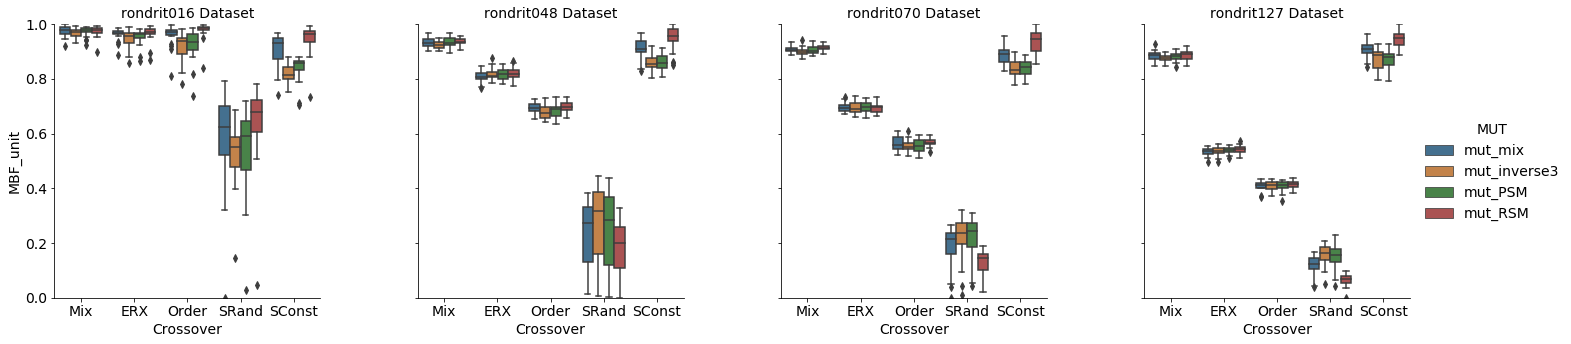

In [10]:

# g = sns.catplot(x="who", y="survived", col="class",
#                  data=titanic, saturation=.5,
#         kind="bar", ci=None, aspect=.6)
matplotlib.rcParams.update({'font.size': 14})

g=sns.catplot(x="CROSS", y="MBF_unit",orient="v",col="Dataset",hue="MUT",kind="box", data=def_table,saturation=0.5);
(g.set_axis_labels("Crossover","MBF_unit")
.set_xticklabels(["Mix", "ERX", "Order","SRand","SConst"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 1))
) 

# Pr_Cross/Mut for best Cross,Mut

In [29]:
df=def_table.copy()
df=df[df["CROSS"].isin(["cross_sequential_constructive"])]
df=df[df["MUT"].isin(["mut_RSM"])]



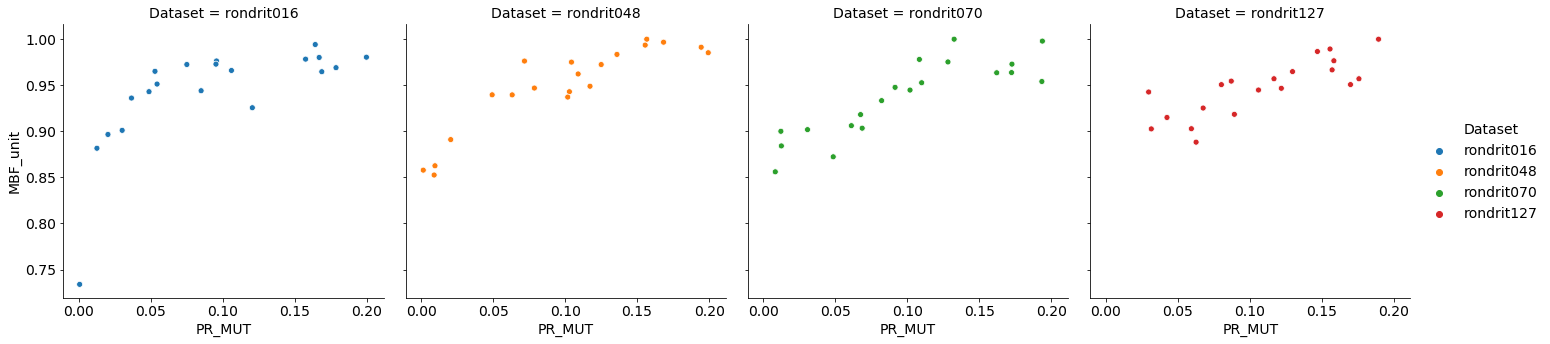

In [31]:
sns.relplot(x="PR_MUT", y="MBF_unit", hue="Dataset",col="Dataset" ,data=df);

In [11]:
crop_dict=crop_table_best(df_dict)

# Pr Cross Finetune Results

# Coarse  %_Cross in [0.1,1]


In [13]:
exp_type="finetune_"

finetune_class_dict=create_tables(dir_folder,metric_list,exp_type)

In [14]:
df_dict_finetune=table_pipeline_basic(finetune_class_dict,drop=False)
def_table_finetune=pd.concat(df_dict_finetune.values())
def_table_finetune.head()

,CROSS,MUT,PR_CROSS,PR_MUT,MBF,Peak_Best,MEff,MBF_unit,MEff_unit,Dataset,CritSum
0,cross_sequential_constructive,mut_RSM,0.735441,0.2,3.387794,3.349954,0.011001,0.909444,0.747404,rondrit016,0.828424
1,cross_sequential_constructive,mut_RSM,0.128650,0.2,3.395172,3.349954,0.010442,0.827121,0.096082,rondrit016,0.461602
2,cross_sequential_constructive,mut_RSM,0.349231,0.2,3.418445,3.349954,0.010918,0.567475,0.650371,rondrit016,0.608923
3,cross_sequential_constructive,mut_RSM,0.141554,0.2,3.412750,3.349954,0.010360,0.631007,0.000000,rondrit016,0.315503
4,cross_sequential_constructive,mut_RSM,0.187419,0.2,3.416770,3.349954,0.010649,0.586154,0.337582,rondrit016,0.461868


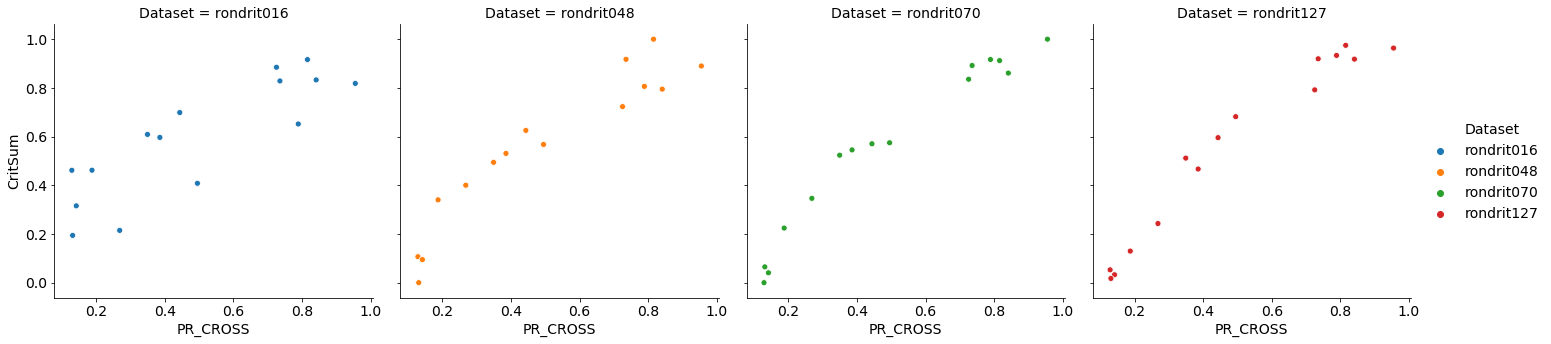

In [15]:
sns.relplot(x="PR_CROSS", y="CritSum", hue="Dataset",col="Dataset" ,data=def_table_finetune);

# FineGrained %_Cross in [0.8,1]


In [16]:
exp_type="PR_CROSS_"
fg_class_dict=create_tables(dir_folder,metric_list,exp_type)

In [17]:
df_dict_fg=table_pipeline_basic(fg_class_dict,drop=False)
def_table_fg=pd.concat(df_dict_fg.values())
def_table_fg.head()

,CROSS,MUT,PR_CROSS,PR_MUT,MBF,Peak_Best,MEff,MBF_unit,MEff_unit,Dataset,CritSum
0,cross_sequential_constructive,mut_RSM,0.864864,0.2,3.427602,3.349954,0.011131,0.000000,0.485195,rondrit016,0.242597
1,cross_sequential_constructive,mut_RSM,0.875608,0.2,3.407498,3.349954,0.011068,0.491344,0.239027,rondrit016,0.365185
2,cross_sequential_constructive,mut_RSM,0.889805,0.2,3.404063,3.349954,0.011211,0.575286,0.796150,rondrit016,0.685718
3,cross_sequential_constructive,mut_RSM,0.822601,0.2,3.407827,3.349954,0.011007,0.483309,0.000000,rondrit016,0.241654
4,cross_sequential_constructive,mut_RSM,0.900267,0.2,3.386685,3.349954,0.011219,1.000000,0.829572,rondrit016,0.914786


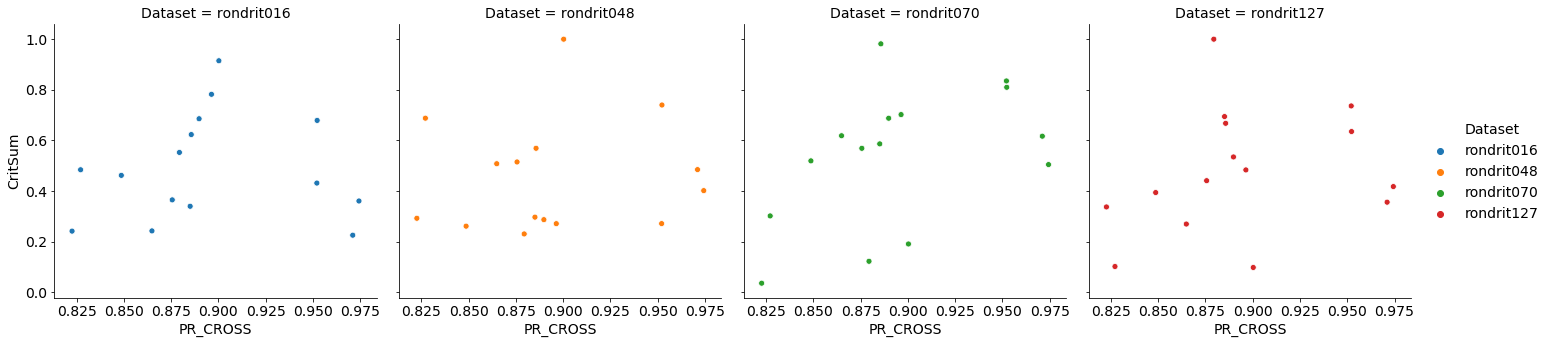

In [18]:
sns.relplot(x="PR_CROSS", y="CritSum", hue="Dataset",col="Dataset" ,data=def_table_fg);

# Ours vs Ap1

In [42]:
def load_matlab_ts_comp(matfiles,matfolders,Heur=False):
    """Aux function to load Running res struct from .mat files
        as a pandas df"""
    NIND_vector=50

    ts_dict={}
    count=0
    Approach=["Existing","Ours"]
    for el in zip(matfiles,matfolders):
        matfile=el[0]; matfolder=el[1];
        mat_str = loadmat(os.path.join(matfolder,matfile))
        items=[item for item in mat_str['running_res'][0][0]]
    #     fit_values=[items[1].flat[i] for i in range(items[1].shape[1])]
        fit_values=items[1].flat[1]
        # Data
        #Create dict from ts data
        ts_dict["epoch"]=range(fit_values.shape[1])
        ts_dict["{0}".format(Approach[count])]=fit_values.flatten()
        count+=1
    return pd.DataFrame(ts_dict)


In [35]:
#Set-up
with cd(os.path.join(os.getcwd(),'..')):
    results_path=os.path.join(os.path.join(os.getcwd(),"Ap1"))
    assert os.path.isdir(results_path), "Wrong folder"

In [44]:
ts_files_Ap1=[file for file in os.listdir(results_path) if (("Running_Res" in file) and  (".mat" in file) and ("Ap1" in file))]
# dict_ts_1={}
ts_files_ours=[file for file in os.listdir(dir_folder) if (("Running_Res" in file) and  (".mat" in file))]
ts_files_ours
matfolders=[results_path,dir_folder]
dict_ts={}
for el in zip(ts_files_Ap1,ts_files_ours,df_dict.keys()):
    matfiles=[el[0],el[1]]
    Dataset=el[2]
    
    dict_ts[Dataset]=load_matlab_ts_comp(matfiles,matfolders)


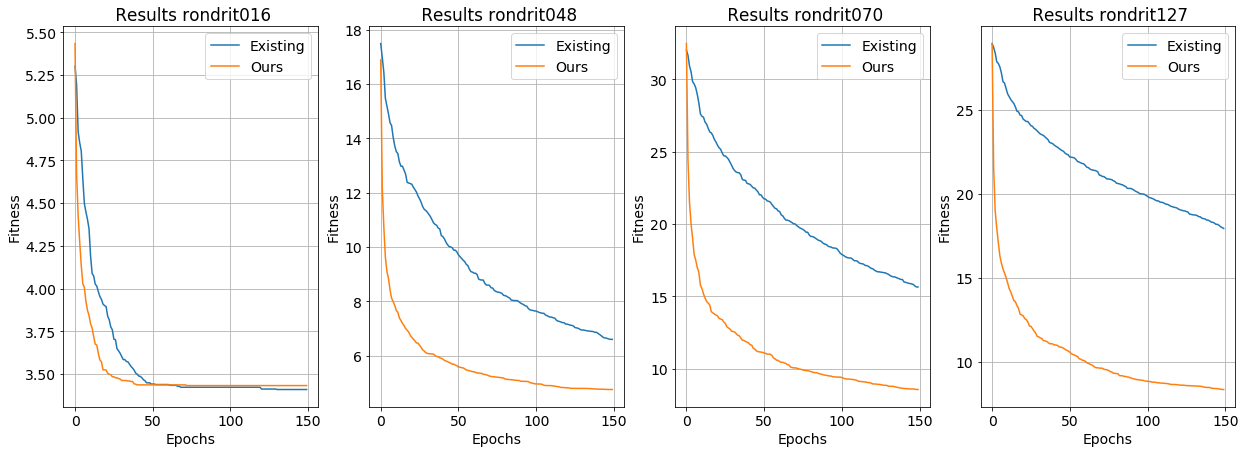

In [45]:
fig, axs = plt.subplots(1, len(df_dict.keys()), sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(dict_ts.keys()):
    plot_ts_scal(Dataset,dict_ts,axs[i])